In [1]:
import os
import pandas as pd
from config_file import data_path


In [3]:
df_sessions = pd.read_csv(os.path.join(data_path, 'sessions_timestamp_track.csv'))
df_sessions.head()

,timestamp,track_id
0,2023-04-23 10:55:15.981821,67RumCZoIMSrMrmSJCMAyB
1,2023-04-23 10:59:00.449821,5qN5zaiB1xHWFUMcDnk63i
2,2023-04-23 11:00:48.431821,4aofUnCLfe1tTZtF603Alt
3,2023-04-23 11:04:10.181821,6LxrH32gVsa254jEaDYHjb
4,2023-04-23 11:05:15.336821,5LmqBIugWpgE9OA8jFk4i3


In [4]:
df_sessions['timestamp'] = pd.to_datetime(df_sessions['timestamp'])

In [5]:
df_sessions['timestamp'].min(), df_sessions['timestamp'].max()

(Timestamp('2019-10-08 19:22:41.020916'),
 Timestamp('2023-12-04 00:19:13.830956'))

In [7]:
df_tracks = pd.read_csv(os.path.join(data_path, 'tracks_ids.csv'))
df_tracks.head()

,id,id_artist
0,6C0WWu7RYKbAgWUI3YC0sT,7u710e44HW3K7A5eTnRqHC
1,4q7EBRq8ncztC2PRmEC7Fy,3sFhA6G1N0gG1pszb6kk1m
2,7cNyONpVADZVrW9xe3qq4z,7IAXZaLTb6nkJr8RmVPn5y
3,1bKRTzTFz7wHMxpgZSuPR1,5bOsFzuJ6QZMr86ezC4oXY
4,56OEjuyZ3AROnv4aR1XqhD,6zJ7WZkyTNmB1bFdmHH2k9


In [14]:
df_tracks.rename(columns={'id': 'track_id'}, inplace=True)
df_tracks.head()

,track_id,id_artist
0,6C0WWu7RYKbAgWUI3YC0sT,7u710e44HW3K7A5eTnRqHC
1,4q7EBRq8ncztC2PRmEC7Fy,3sFhA6G1N0gG1pszb6kk1m
2,7cNyONpVADZVrW9xe3qq4z,7IAXZaLTb6nkJr8RmVPn5y
3,1bKRTzTFz7wHMxpgZSuPR1,5bOsFzuJ6QZMr86ezC4oXY
4,56OEjuyZ3AROnv4aR1XqhD,6zJ7WZkyTNmB1bFdmHH2k9


In [13]:
df_tracks.columns, df_sessions.columns

(Index(['id', 'id_artist'], dtype='object'),
 Index(['timestamp', 'track_id'], dtype='object'))

In [16]:
df_session_artist = df_sessions.merge(df_tracks, on='track_id')
df_session_artist = df_session_artist[['timestamp', 'id_artist']]
df_session_artist.head()

,timestamp,id_artist
0,2023-04-23 10:55:15.981821,0k17h0D3J5VfsdmQ1iZtE9
1,2023-09-24 22:59:40.227474,0k17h0D3J5VfsdmQ1iZtE9
2,2023-04-23 10:02:26.798940,0k17h0D3J5VfsdmQ1iZtE9
3,2023-05-07 16:45:18.572148,0k17h0D3J5VfsdmQ1iZtE9
4,2022-12-26 00:35:53.980977,0k17h0D3J5VfsdmQ1iZtE9


In [20]:
df_artists = pd.read_csv(os.path.join(data_path, 'artists_ids.csv'))

In [21]:
len(df_session_artist['id_artist'].unique()), len(df_artists['id'].unique())

(794, 27650)

In [24]:
# plot the number of session per artist
session_counts = df_session_artist['id_artist'].value_counts()


id_artist
4AK6F7OLvEQ5QYCBNiQWHq    11529
15UsOTVnJzReFVN1VCnxy4     8660
711MCceyCBcFnzjGY4Q7Un     6098
3klZnJvYGIbWritVwQD434     5782
0eDvMgVFoNV3TpwtrVCoTj     5765
Name: count, dtype: int64

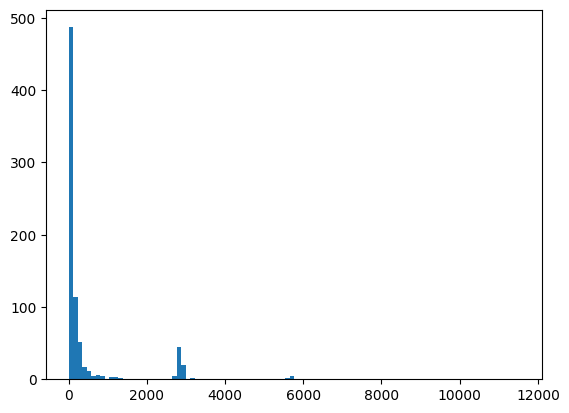

In [47]:
df_session_counts = pd.DataFrame(session_counts)
session_counts_list = df_session_counts['count'].tolist()
# hist plot session counts list
import matplotlib.pyplot as plt
plt.hist(session_counts_list, bins=100)
plt.show()

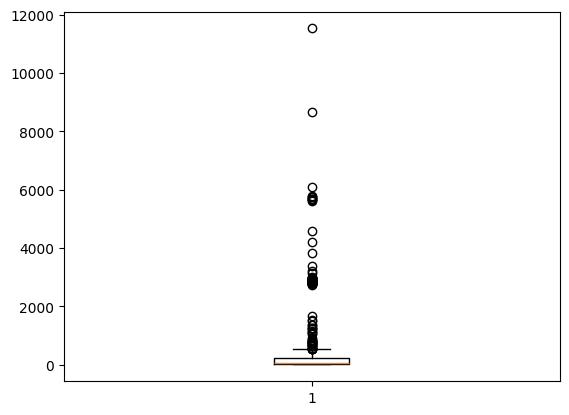

In [48]:
# box plot session counts list
plt.boxplot(session_counts_list)
plt.show()